In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tkinter import *
from PIL import ImageTk, Image

In [3]:
import matplotlib.pylab  as plt
import os
import nibabel as nib
import numpy as np

In [4]:
from mst_segmentation_functions import prepare_image, mst_construction, BFS_path, split_components, nodes_image
from mst_segmentation_functions import segmented_and_labels

In [11]:
# Loading image prefarably .jpg 
#image_original = plt.imread(".jpg")

In [12]:
# Preprocess the original image. Returned images: input_image, image(filtered) are used in tkinter
input_image, image = prepare_image(image_original, sigma = 0.3)

In [13]:
# The mst is constructed from the filtered image
mst = mst_construction(image)

In [14]:
root = Tk()
height, width  = input_image.shape[:2]
# created canvas
canvas = Canvas(root, bd=0,highlightthickness=0, relief = RIDGE, width=width, height=height)

canvas.pack(fill = BOTH, expand = True)

#adding the image
pil_image = Image.fromarray(image)
img = ImageTk.PhotoImage(pil_image)

## Get image for accesing the nodes
to_numpy_array = np.array(pil_image)
node_image = nodes_image(to_numpy_array)
# put the image in canvas
canvas.create_image(0,0,image=img,anchor="nw")

node1 =  None
node2 =  None
def printnode(event):
    # out putting x and y 
    x=event.x; y=event.y
    # Convert the new coords to capture coords of the input image
    global clicked_row, clicked_column,  original_row, original_column
    clicked_row, clicked_column = y, x
    original_row, original_column  = height, width
    global transformed_rows, transformed_columns, true_row_original, true_column_original
    transformed_rows, transformed_columns =  resized_array.shape[:2]
    true_row_original = (original_row/transformed_rows)*clicked_row
    true_column_original = (original_column/transformed_columns)*clicked_column
    x, y = int(true_column_original), int(true_row_original)
    
    global node1, node2
    val = node_image[y,x]
    if node1 is None:
        node1 = val
    else:
        node2 = val
    print("clicked node ", val)
   

# #For dynamic resizing  of the window
def resize_dynamically(event):
    global bgg, resized, bg2, resized_array
    # open image to resize it
    bgg = Image.fromarray(input_image)
    # resize the image with width and height of root
    resized = bgg.resize((event.width, event.height),Image.ANTIALIAS)
    resized_array = np.array(resized)
    
    bg2 = ImageTk.PhotoImage(resized)
    canvas.create_image(0, 0, image=bg2, anchor='nw')

# #mouseclick event
canvas.bind("<Button 1>",printnode)
root.bind("<Configure>", resize_dynamically)
root.mainloop()

clicked node  36279
clicked node  39917


In [15]:
new_labels = split_components(mst, node1, node2)

In [16]:
segmented_image, labels = segmented_and_labels(new_labels, image)

(-0.5, 361.5, 433.5, -0.5)

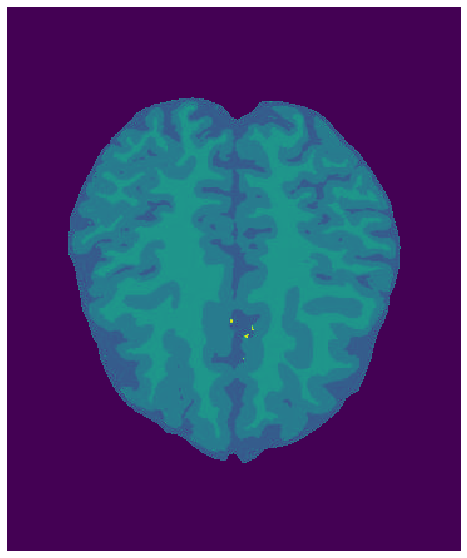

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(segmented_image)
plt.axis('off')

In [ ]:
# To perform perfomramce analysis import dice and jaccard_binary functions from "performance_analysis.py"
# from sklearn.metrics import confusion_matrix
dsimilarity = dice(IMG_orig,  IMG_predicted)
jbinary = jaccard_binary(IMG_orig.flatten(), IMG_predicted.flatten())
tn, fp, fn, tp = confusion_matrix(IMG_orig.flatten(), IMG_predicted.flatten()).ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)